# IBM Capstone Project: Clustering Tourist Locations 

In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

## Fourquare Details

In [3]:
CLIENT_ID = 'EWNJDIO0ZSTSGJ2GM1DQVUZFH5IMEVHPXVC4URBUMKMXNVQI' # your Foursquare ID
CLIENT_SECRET = 'DN4MHPYMWO5C33JN3AYU4MFC0TWKSSV35VIONA41QN2BZKQI' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
radius = 1000

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EWNJDIO0ZSTSGJ2GM1DQVUZFH5IMEVHPXVC4URBUMKMXNVQI
CLIENT_SECRET:DN4MHPYMWO5C33JN3AYU4MFC0TWKSSV35VIONA41QN2BZKQI


## Loading the csv into Watson studio

In [6]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_64c5926589b241e3aca0e5b521a99f9b = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='E2dDNshI7HN9EVuxmSFQUAoa75yaGCYDcoPKjDAysKPG',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_64c5926589b241e3aca0e5b521a99f9b.get_object(Bucket='ibmcapstoneproject-donotdelete-pr-yqcouj55flngua',Key='Tourist_Locations.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)

In [5]:
tourist = df_data_1
tourist.head()

,Tourist Location,City,Longitude,Latitude
0,Grand Bazaar,Istanbul,41.0107,28.9681
1,Sensoji Temple,Tokyo,35.7148,139.7967
2,Niagara Falls,Toronto,43.0962,79.0377
3,Acropolis of Athens,Athens,37.9715,23.7257
4,Eiffel Tower,Paris,48.8584,2.2945


## Using Foursquare API to extract location information
#### The code was run 10 times for the different tourist sites

In [9]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id=EWNJDIO0ZSTSGJ2GM1DQVUZFH5IMEVHPXVC4URBUMKMXNVQI&client_secret=DN4MHPYMWO5C33JN3AYU4MFC0TWKSSV35VIONA41QN2BZKQI&ll=13.7501,100.4913&radius=1000&limit=100&v=20180604'

# send GET request and get trending venues
results = requests.get(url).json()
results

# assign relevant part of JSON to venues
venues_th = results["response"]['groups'][0]['items']
nearby_venues = json_normalize(venues_th)

# filter columns
filtered_columns = ['venue.name', 'venue.categories','venue.location.cc']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)


# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues.head()

,name,categories,cc
0,Dusit Maha Prasat Throne Hall (พระที่นั่งดุสิต...,Palace,TH
1,Temple of the Emerald Buddha (วัดพระศรีรัตนศาส...,Buddhist Temple,TH
2,Chakri Maha Prasat Throne Hall (พระที่นั่งจักร...,Palace,TH
3,The Grand Palace (พระบรมมหาราชวัง),Palace,TH
4,Prasat Phra Thep Bidon (ปราสาทพระเทพบิดร),Palace,TH


In [10]:
len(nearby_venues['categories'].unique())

40

In [11]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id=EWNJDIO0ZSTSGJ2GM1DQVUZFH5IMEVHPXVC4URBUMKMXNVQI&client_secret=DN4MHPYMWO5C33JN3AYU4MFC0TWKSSV35VIONA41QN2BZKQI&ll=48.8867,2.3431&radius=1000&limit=100&v=20180604'

# send GET request and get trending venues
results = requests.get(url).json()
results

# assign relevant part of JSON to venues
venues_fr = results["response"]['groups'][0]['items']
nearby_venues_fr = json_normalize(venues_fr)

# filter columns
filtered_columns = ['venue.name', 'venue.categories','venue.location.cc']
nearby_venues_fr =nearby_venues_fr.loc[:, filtered_columns]

nearby_venues_fr

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
nearby_venues_fr['venue.categories'] = nearby_venues_fr.apply(get_category_type, axis=1)


# clean columns
nearby_venues_fr.columns = [col.split(".")[-1] for col in nearby_venues_fr.columns]
nearby_venues_fr.head()

,name,categories,cc
0,Hardware Société,Breakfast Spot,FR
1,Dôme de la Basilique du Sacré-Cœur,Scenic Lookout,FR
2,Halle Saint-Pierre,Art Museum,FR
3,Grenouilles,Sandwich Place,FR
4,Babalou,Italian Restaurant,FR


In [14]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id=EWNJDIO0ZSTSGJ2GM1DQVUZFH5IMEVHPXVC4URBUMKMXNVQI&client_secret=DN4MHPYMWO5C33JN3AYU4MFC0TWKSSV35VIONA41QN2BZKQI&ll=41.9022,12.4539&radius=1000&limit=100&v=20180604'

# send GET request and get trending venues
results = requests.get(url).json()
results

# assign relevant part of JSON to venues
venues_it = results["response"]['groups'][0]['items']
nearby_venues_it = json_normalize(venues_it)

# filter columns
filtered_columns = ['venue.name', 'venue.categories','venue.location.cc']
nearby_venues_it =nearby_venues_it.loc[:, filtered_columns]

nearby_venues_it

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
nearby_venues_it['venue.categories'] = nearby_venues_it.apply(get_category_type, axis=1)


# clean columns
nearby_venues_it.columns = [col.split(".")[-1] for col in nearby_venues_it.columns]
nearby_venues_it.head()

,name,categories,cc
0,Basilica di San Pietro (Basilica Sancti Petri),Church,VA
1,Cupola di San Pietro,Scenic Lookout,IT
2,Cappella Sistina (Cappella Sixtina),Church,VA
3,Scavi della Basilica di San Pietro,Historic Site,IT
4,Piazza San Pietro,Plaza,VA


In [15]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id=EWNJDIO0ZSTSGJ2GM1DQVUZFH5IMEVHPXVC4URBUMKMXNVQI&client_secret=DN4MHPYMWO5C33JN3AYU4MFC0TWKSSV35VIONA41QN2BZKQI&ll=27.1751,78.0421&limit=100&v=20180604'

# send GET request and get trending venues
results = requests.get(url).json()
results

# assign relevant part of JSON to venues
venues_in = results["response"]['groups'][0]['items']
nearby_venues_in = json_normalize(venues_in)

# filter columns
filtered_columns = ['venue.name', 'venue.categories','venue.location.cc']
nearby_venues_in =nearby_venues_in.loc[:, filtered_columns]

nearby_venues_in

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
nearby_venues_in['venue.categories'] = nearby_venues_in.apply(get_category_type, axis=1)


# clean columns
nearby_venues_in.columns = [col.split(".")[-1] for col in nearby_venues_in.columns]
nearby_venues_in.head()

,name,categories,cc
0,Taj Mahal | ताज महल | تاج محل (Taj Mahal),Historic Site,IN
1,The Oberoi Amarvilas,Hotel,IN
2,Agra Fort | आगरा का किला | آگرہ قلعہ (Agra Fort),Historic Site,IN
3,Mehtab Bagh | मेहताब बाग़ | ماہتاب باغ (Mehtab...,Garden,IN
4,Trident,Hotel,IN


In [16]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id=EWNJDIO0ZSTSGJ2GM1DQVUZFH5IMEVHPXVC4URBUMKMXNVQI&client_secret=DN4MHPYMWO5C33JN3AYU4MFC0TWKSSV35VIONA41QN2BZKQI&ll=41.0107,28.9681&radius=1000&limit=100&v=20180604'

# send GET request and get trending venues
results = requests.get(url).json()
results

# assign relevant part of JSON to venues
venues_is = results["response"]['groups'][0]['items']
nearby_venues_is = json_normalize(venues_is)

# filter columns
filtered_columns = ['venue.name', 'venue.categories','venue.location.cc']
nearby_venues_is =nearby_venues_is.loc[:, filtered_columns]

nearby_venues_is

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
nearby_venues_is['venue.categories'] = nearby_venues_is.apply(get_category_type, axis=1)


# clean columns
nearby_venues_is.columns = [col.split(".")[-1] for col in nearby_venues_is.columns]
nearby_venues_is.head()

,name,categories,cc
0,Kapalıçarşı,Historic Site,TR
1,Day Day Pastanesi,Bakery,TR
2,Cevahir Bedesteni (Oldbazaar),Antique Shop,TR
3,Nuruosmaniye Camii,Mosque,TR
4,Rejon Kebap House,Turkish Restaurant,TR


In [17]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id=EWNJDIO0ZSTSGJ2GM1DQVUZFH5IMEVHPXVC4URBUMKMXNVQI&client_secret=DN4MHPYMWO5C33JN3AYU4MFC0TWKSSV35VIONA41QN2BZKQI&ll=35.7148,139.7967&radius=1000&limit=100&v=20180604'

# send GET request and get trending venues
results = requests.get(url).json()
results

# assign relevant part of JSON to venues
venues_ty = results["response"]['groups'][0]['items']
nearby_venues_ty = json_normalize(venues_ty)

# filter columns
filtered_columns = ['venue.name', 'venue.categories','venue.location.cc']
nearby_venues_ty =nearby_venues_ty.loc[:, filtered_columns]

nearby_venues_ty

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
nearby_venues_ty['venue.categories'] = nearby_venues_ty.apply(get_category_type, axis=1)


# clean columns
nearby_venues_ty.columns = [col.split(".")[-1] for col in nearby_venues_ty.columns]
nearby_venues_ty.head()

,name,categories,cc
0,Senso-ji Temple (浅草寺),Buddhist Temple,JP
1,Suzukien (壽々喜園),Dessert Shop,JP
2,Imahan Bekkan (今半別館),Sukiyaki Restaurant,JP
3,Khaosan Tokyo Origami (カオサン東京オリガミ),Hostel,JP
4,大学いも 千葉屋,Dessert Shop,JP


In [18]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id=EWNJDIO0ZSTSGJ2GM1DQVUZFH5IMEVHPXVC4URBUMKMXNVQI&client_secret=DN4MHPYMWO5C33JN3AYU4MFC0TWKSSV35VIONA41QN2BZKQI&ll=37.9715,23.7257&radius=1000&limit=100&v=20180604'

# send GET request and get trending venues
results = requests.get(url).json()
results

# assign relevant part of JSON to venues
venues_gr = results["response"]['groups'][0]['items']
nearby_venues_gr = json_normalize(venues_gr)

# filter columns
filtered_columns = ['venue.name', 'venue.categories','venue.location.cc']
nearby_venues_gr =nearby_venues_gr.loc[:, filtered_columns]

nearby_venues_gr

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
nearby_venues_gr['venue.categories'] = nearby_venues_gr.apply(get_category_type, axis=1)


# clean columns
nearby_venues_gr.columns = [col.split(".")[-1] for col in nearby_venues_gr.columns]
nearby_venues_gr.head()

,name,categories,cc
0,Herod Atticus Odeon (Ωδείο Ηρώδου Αττικού),Historic Site,GR
1,Parthenon (Παρθενώνας),Historic Site,GR
2,Temple of Athena Nike (Ναός της Αθηνάς Νίκης),Historic Site,GR
3,Acropolis of Athens (Ακρόπολη Αθηνών),Hill,GR
4,Erechtheion (Ερέχθειο),Historic Site,GR


In [19]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id=EWNJDIO0ZSTSGJ2GM1DQVUZFH5IMEVHPXVC4URBUMKMXNVQI&client_secret=DN4MHPYMWO5C33JN3AYU4MFC0TWKSSV35VIONA41QN2BZKQI&ll=48.8584,2.2945&radius=1000&limit=100&v=20180604'

# send GET request and get trending venues
results = requests.get(url).json()
results

# assign relevant part of JSON to venues
venues_fra = results["response"]['groups'][0]['items']
nearby_venues_fra = json_normalize(venues_fra)

# filter columns
filtered_columns = ['venue.name', 'venue.categories','venue.location.cc']
nearby_venues_fra =nearby_venues_fra.loc[:, filtered_columns]

nearby_venues_fra

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
nearby_venues_fra['venue.categories'] = nearby_venues_fra.apply(get_category_type, axis=1)


# clean columns
nearby_venues_fra.columns = [col.split(".")[-1] for col in nearby_venues_fra.columns]
nearby_venues_fra.head()

,name,categories,cc
0,Tour Eiffel,Monument / Landmark,FR
1,Restaurant 58 Tour Eiffel,French Restaurant,FR
2,Sommet de la Tour Eiffel,Scenic Lookout,FR
3,Le Jules Verne,French Restaurant,FR
4,Bar à Champagne,Champagne Bar,FR


In [20]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id=EWNJDIO0ZSTSGJ2GM1DQVUZFH5IMEVHPXVC4URBUMKMXNVQI&client_secret=DN4MHPYMWO5C33JN3AYU4MFC0TWKSSV35VIONA41QN2BZKQI&ll=39.9169,116.3907&radius=1000&limit=100&v=20180604'

# send GET request and get trending venues
results = requests.get(url).json()
results

# assign relevant part of JSON to venues
venues_ch = results["response"]['groups'][0]['items']
nearby_venues_ch = json_normalize(venues_ch)

# filter columns
filtered_columns = ['venue.name', 'venue.categories','venue.location.cc']
nearby_venues_ch =nearby_venues_ch.loc[:, filtered_columns]

nearby_venues_ch

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
nearby_venues_ch['venue.categories'] = nearby_venues_ch.apply(get_category_type, axis=1)


# clean columns
nearby_venues_ch.columns = [col.split(".")[-1] for col in nearby_venues_ch.columns]
nearby_venues_ch.head()

,name,categories,cc
0,Forbidden City (Palace Museum) (故宫（博物院）),Historic Site,CN
1,Palace of Heavenly Purity (乾清宫),Historic Site,CN
2,Hall of Preserving Harmony (保和殿),Historic Site,CN
3,Hall of Supreme Harmony (太和殿),Historic Site,CN
4,Hall of Central Harmony (中和殿),Historic Site,CN


In [21]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id=EWNJDIO0ZSTSGJ2GM1DQVUZFH5IMEVHPXVC4URBUMKMXNVQI&client_secret=DN4MHPYMWO5C33JN3AYU4MFC0TWKSSV35VIONA41QN2BZKQI&ll=48.8530,2.3499&radius=1000&limit=100&v=20180604'

# send GET request and get trending venues
results = requests.get(url).json()
results

# assign relevant part of JSON to venues
venues_notre = results["response"]['groups'][0]['items']
nearby_venues_notre = json_normalize(venues_notre)

# filter columns
filtered_columns = ['venue.name', 'venue.categories','venue.location.cc']
nearby_venues_notre =nearby_venues_notre.loc[:, filtered_columns]

nearby_venues_notre

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
nearby_venues_notre['venue.categories'] = nearby_venues_notre.apply(get_category_type, axis=1)


# clean columns
nearby_venues_notre.columns = [col.split(".")[-1] for col in nearby_venues_notre.columns]
nearby_venues_notre.head()

,name,categories,cc
0,Cathédrale Notre-Dame de Paris,Church,FR
1,Shakespeare & Company,Bookstore,FR
2,Sola,Japanese Restaurant,FR
3,Tours de la Cathédrale Notre-Dame de Paris,Scenic Lookout,FR
4,Comme chai Toi,French Restaurant,FR


In [22]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id=EWNJDIO0ZSTSGJ2GM1DQVUZFH5IMEVHPXVC4URBUMKMXNVQI&client_secret=DN4MHPYMWO5C33JN3AYU4MFC0TWKSSV35VIONA41QN2BZKQI&ll=25.1972,55.2744&radius=1000&limit=100&v=20180604'

# send GET request and get trending venues
results = requests.get(url).json()
results

# assign relevant part of JSON to venues
venues_db = results["response"]['groups'][0]['items']
nearby_venues_db = json_normalize(venues_db)

# filter columns
filtered_columns = ['venue.name', 'venue.categories','venue.location.cc']
nearby_venues_db =nearby_venues_db.loc[:, filtered_columns]

nearby_venues_db

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
nearby_venues_db['venue.categories'] = nearby_venues_db.apply(get_category_type, axis=1)


# clean columns
nearby_venues_db.columns = [col.split(".")[-1] for col in nearby_venues_db.columns]
nearby_venues_db.head()

,name,categories,cc
0,Fashion Avenue,Boutique,AE
1,Burj Khalifa (برج خليفة),Monument / Landmark,AE
2,Armani Lounge,Lounge,AE
3,Cartier (كارتييه),Jewelry Store,AE
4,Armani Hotel Dubai (فندق أرماني دبي),Hotel,AE


## Concatenate all the dataframes into one

In [23]:
frame = [nearby_venues, nearby_venues_fr, nearby_venues_ty, nearby_venues_is, nearby_venues_it, nearby_venues_in, nearby_venues_gr, nearby_venues_fra, nearby_venues_ch, nearby_venues_db]
concat = pd.concat(frame)

In [24]:
t_explore = concat.rename(columns={'cc': 'country'})
t_explore.head() 

,name,categories,country
0,Dusit Maha Prasat Throne Hall (พระที่นั่งดุสิต...,Palace,TH
1,Temple of the Emerald Buddha (วัดพระศรีรัตนศาส...,Buddhist Temple,TH
2,Chakri Maha Prasat Throne Hall (พระที่นั่งจักร...,Palace,TH
3,The Grand Palace (พระบรมมหาราชวัง),Palace,TH
4,Prasat Phra Thep Bidon (ปราสาทพระเทพบิดร),Palace,TH


In [25]:
t_explore.groupby('country').count() # to obtain the number of entries per country

,name,categories
country,,
AE,100,100
CN,66,66
FR,200,200
GR,100,100
IN,60,60
IT,92,92
JP,100,100
TH,100,100
TR,100,100


In [26]:
len(concat['categories'].unique()) # to obtain the number of unique categories in the data

191

## Preparations for K Means begin with One Hot Encoding 

In [28]:
# one hot encoding
to_onehot = pd.get_dummies(t_explore[['categories']], prefix="", prefix_sep="")

# add categories and country columns into the dataframe
to_onehot['categories'] = t_explore['categories'] 
to_onehot['country'] = t_explore['country']

# move country column to the first column
fixed_columns = [to_onehot.columns[-1]] + list(to_onehot.columns[:-1])
to_onehot = to_onehot[fixed_columns]

print(to_onehot.shape)
to_onehot

(926, 193)


,country,Airport,American Restaurant,Antique Shop,Aquarium,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Vietnamese Restaurant,Vineyard,Wagashi Place,Watch Shop,Wine Bar,Wine Shop,Wings Joint,Yoshoku Restaurant,Zhejiang Restaurant,categories
0,TH,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Palace
1,TH,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Buddhist Temple
2,TH,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Palace
3,TH,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Palace
4,TH,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Palace
5,TH,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Thai Restaurant
6,TH,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Art Museum
7,TH,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Historic Site
8,TH,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Café
9,TH,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Massage Studio


## Group the dataframe by country

In [29]:
to_grouped = to_onehot.groupby('country').mean().reset_index()

print(to_grouped.shape)
to_grouped

(10, 192)


,country,Airport,American Restaurant,Antique Shop,Aquarium,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Vineyard,Wagashi Place,Watch Shop,Wine Bar,Wine Shop,Wings Joint,Yoshoku Restaurant,Zhejiang Restaurant
0,AE,0.000000,0.02,0.00,0.01,0.000,0.000,0.000000,0.000,0.000000,...,0.000000,0.00,0.000,0.00,0.01,0.000000,0.000,0.00,0.00,0.000000
1,CN,0.000000,0.00,0.00,0.00,0.000,0.000,0.000000,0.000,0.000000,...,0.000000,0.00,0.000,0.00,0.00,0.000000,0.000,0.00,0.00,0.015152
2,FR,0.000000,0.00,0.00,0.00,0.005,0.005,0.000000,0.035,0.000000,...,0.005000,0.00,0.005,0.00,0.00,0.020000,0.005,0.00,0.00,0.000000
3,GR,0.000000,0.00,0.00,0.00,0.000,0.000,0.020000,0.010,0.000000,...,0.010000,0.00,0.000,0.00,0.00,0.030000,0.000,0.00,0.00,0.000000
4,IN,0.016667,0.00,0.00,0.00,0.000,0.000,0.000000,0.000,0.016667,...,0.000000,0.00,0.000,0.00,0.00,0.000000,0.000,0.00,0.00,0.000000
5,IT,0.000000,0.00,0.00,0.00,0.000,0.000,0.032609,0.000,0.000000,...,0.021739,0.00,0.000,0.00,0.00,0.021739,0.000,0.00,0.00,0.000000
6,JP,0.000000,0.00,0.00,0.00,0.000,0.000,0.000000,0.000,0.010000,...,0.000000,0.01,0.000,0.05,0.00,0.000000,0.000,0.00,0.03,0.000000
7,TH,0.000000,0.00,0.00,0.00,0.000,0.000,0.010000,0.010,0.010000,...,0.000000,0.01,0.000,0.00,0.00,0.000000,0.000,0.01,0.00,0.000000
8,TR,0.000000,0.00,0.01,0.00,0.000,0.000,0.030000,0.000,0.020000,...,0.000000,0.00,0.000,0.00,0.00,0.000000,0.000,0.00,0.00,0.000000
9,VA,0.000000,0.00,0.00,0.00,0.000,0.000,0.125000,0.125,0.000000,...,0.000000,0.00,0.000,0.00,0.00,0.000000,0.000,0.00,0.00,0.000000


In [30]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [31]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['country']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
t_sorted = pd.DataFrame(columns=columns)
t_sorted['country'] = to_grouped['country']

for ind in np.arange(to_grouped.shape[0]):
    t_sorted.iloc[ind, 1:] = return_most_common_venues(to_grouped.iloc[ind, :], num_top_venues)

t_sorted

,country,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,AE,Boutique,Hotel,Café,Coffee Shop,Restaurant,Bakery,Clothing Store,Ice Cream Shop,Jewelry Store,Cosmetics Shop
1,CN,Historic Site,Hotel,Café,Chinese Restaurant,Park,Hostel,Scenic Lookout,French Restaurant,Dive Bar,Sculpture Garden
2,FR,French Restaurant,Italian Restaurant,Hotel,Bakery,Plaza,Bistro,Art Museum,Bar,Pizza Place,Restaurant
3,GR,Historic Site,Bar,Greek Restaurant,Ice Cream Shop,Hotel,Coffee Shop,Café,Plaza,Dessert Shop,Wine Bar
4,IN,Hotel,Indian Restaurant,Multicuisine Indian Restaurant,Resort,Fast Food Restaurant,Historic Site,Café,Market,Pizza Place,Coffee Shop
5,IT,Italian Restaurant,Ice Cream Shop,Pizza Place,Hotel,Sandwich Place,Restaurant,Gourmet Shop,Art Gallery,Seafood Restaurant,Dessert Shop
6,JP,Japanese Restaurant,Café,Wagashi Place,Unagi Restaurant,Dessert Shop,BBQ Joint,Soba Restaurant,Hostel,Sukiyaki Restaurant,Coffee Shop
7,TH,Café,Thai Restaurant,Noodle House,Bar,Dessert Shop,Historic Site,Palace,History Museum,Hotel,Asian Restaurant
8,TR,Hotel,Turkish Restaurant,Jewelry Store,Historic Site,Restaurant,Coffee Shop,Dessert Shop,Café,Art Gallery,Plaza
9,VA,Church,Fountain,Museum,Plaza,Art Gallery,Art Museum,Monument / Landmark,French Restaurant,Grilled Meat Restaurant,Greek Restaurant


## Silhouette Score

In [141]:
from sklearn.cluster import KMeans

In [143]:
max_range = 8

tourism_grouped_clustering = to_grouped.drop('country', 1)

from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kmc = tourism_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kmc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kmc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

In [144]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

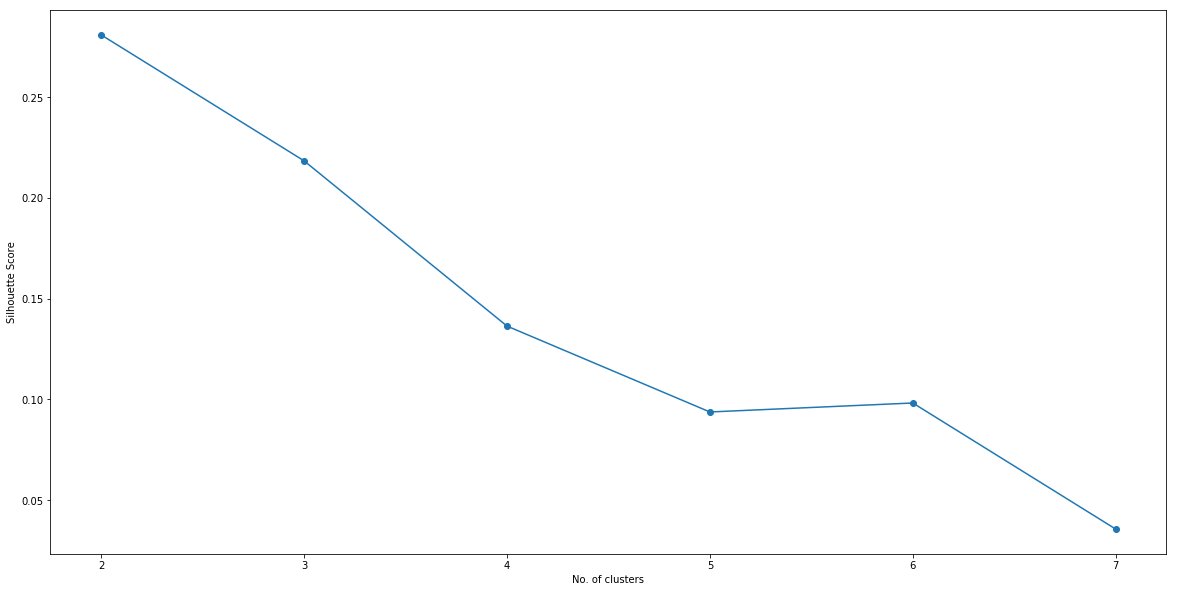

In [145]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

In [167]:
# run k-means clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(kmc)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 0, 1, 1, 3, 1, 1, 1, 1, 2], dtype=int32)

In [168]:
t_explore_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

ValueError: cannot insert Cluster Labels, already exists

In [164]:
t_explore_sorted

,Cluster Labels,country,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,AE,Boutique,Hotel,Café,Coffee Shop,Restaurant,Bakery,Clothing Store,Ice Cream Shop,Jewelry Store,Cosmetics Shop
1,0,CN,Historic Site,Hotel,Café,Chinese Restaurant,Park,Hostel,Scenic Lookout,French Restaurant,Dive Bar,Sculpture Garden
2,1,FR,French Restaurant,Italian Restaurant,Hotel,Bakery,Plaza,Bistro,Art Museum,Bar,Pizza Place,Restaurant
3,1,GR,Historic Site,Bar,Greek Restaurant,Ice Cream Shop,Hotel,Coffee Shop,Café,Plaza,Dessert Shop,Wine Bar
4,3,IN,Hotel,Indian Restaurant,Multicuisine Indian Restaurant,Resort,Fast Food Restaurant,Historic Site,Café,Market,Pizza Place,Coffee Shop
5,1,IT,Italian Restaurant,Ice Cream Shop,Pizza Place,Hotel,Sandwich Place,Restaurant,Gourmet Shop,Art Gallery,Seafood Restaurant,Dessert Shop
6,1,JP,Japanese Restaurant,Café,Wagashi Place,Unagi Restaurant,Dessert Shop,BBQ Joint,Soba Restaurant,Hostel,Sukiyaki Restaurant,Coffee Shop
7,1,TH,Café,Thai Restaurant,Noodle House,Bar,Dessert Shop,Historic Site,Palace,History Museum,Hotel,Asian Restaurant
8,1,TR,Hotel,Turkish Restaurant,Jewelry Store,Historic Site,Restaurant,Coffee Shop,Dessert Shop,Café,Art Gallery,Plaza
9,2,VA,Church,Fountain,Museum,Plaza,Art Gallery,Art Museum,Monument / Landmark,French Restaurant,Grilled Meat Restaurant,Greek Restaurant
